# Genetic oscillators

In [1]:
from pylab import *
%matplotlib inline

## Basic functions

In [2]:
def hA(x, n=2):
    return x**n/(1+x**n)

def hR(x, n=2):
    return 1/(1+x**n)

def AND(a,b):
    return a*b

def OR(a,b):
    return (a+b)/(1+a*b)

## Simple vs delayed autoregulation

In [3]:
T = 10
dt = .01
N = int(T/dt)
ts = arange(0,N)*dt

tau = .5
nt = int(tau/dt)

k=.5

xs = zeros(N)
xsd = zeros(N)

for i in range(nt,N):
    dxdt = hR(xs[i-1]/k, 10)- xs[i-1]
    xs[i] = xs[i-1]+dt*dxdt
        
    dxdt = hR(xsd[i-nt]/k, 10)- xsd[i-1]
    xsd[i] = xsd[i-1]+dt*dxdt

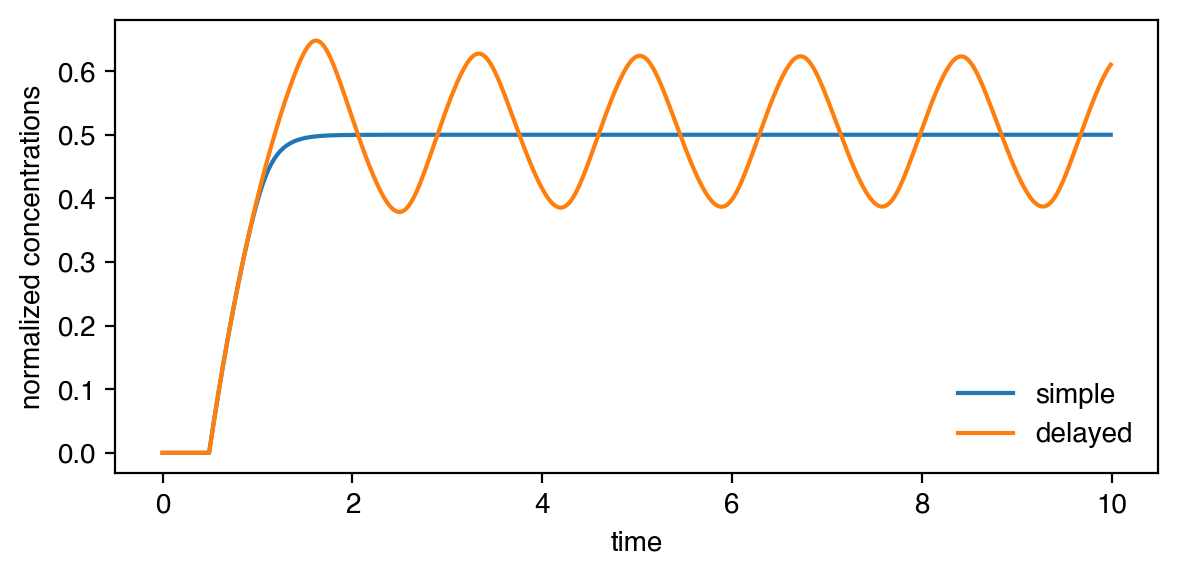

In [4]:
figure(figsize=(6,3))
plot(ts, xs, label="simple")
plot(ts, xsd, label="delayed")
legend(frameon=False)
xlabel("time")
ylabel("normalized concentrations")
tight_layout()
#savefig("../../lecture_6/AR.png", dpi=300)

## Two component negative feedback loop

In [5]:
T = 10
dt = .001
N = int(T/dt)
ts = arange(0,N)*dt

def solve(x0, y0, g, ay):
    xs = zeros(N)
    ys = zeros(N)
    xs[0] = x0
    ys[0] = y0

    for i in range(1,N):
        dxdt = -g*ys[i-1] - xs[i-1]
        dydt = g*xs[i-1] - ay*ys[i-1]
        xs[i] = xs[i-1]+dt*dxdt
        ys[i] = ys[i-1]+dt*dydt
        
    return [xs, ys]

xs1, ys1 = solve(3, 2, g=4, ay=1)
xs2, ys2 = solve(3, 2, g=4, ay=10)

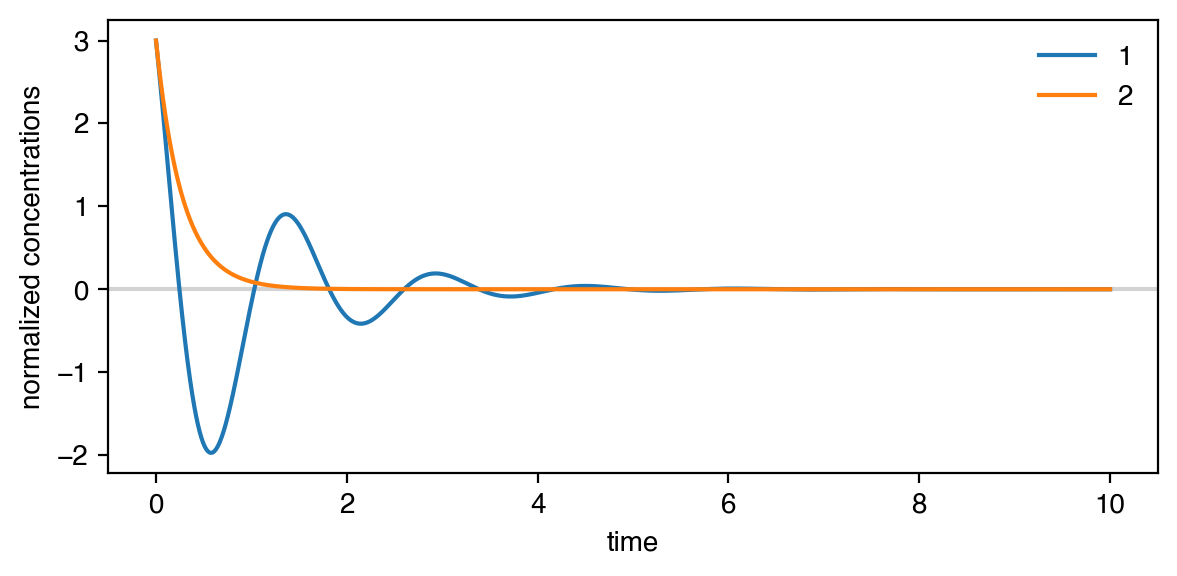

In [6]:
figure(figsize=(6,3))
plot(ts, xs1, label="1")
plot(ts, xs2, label="2")
axhline(0, color="lightgrey", zorder=-1)
legend(frameon=False)
xlabel("time")
ylabel("normalized concentrations")
tight_layout()
savefig("dho.png", dpi=300)

Text(0, 0.5, 'y')

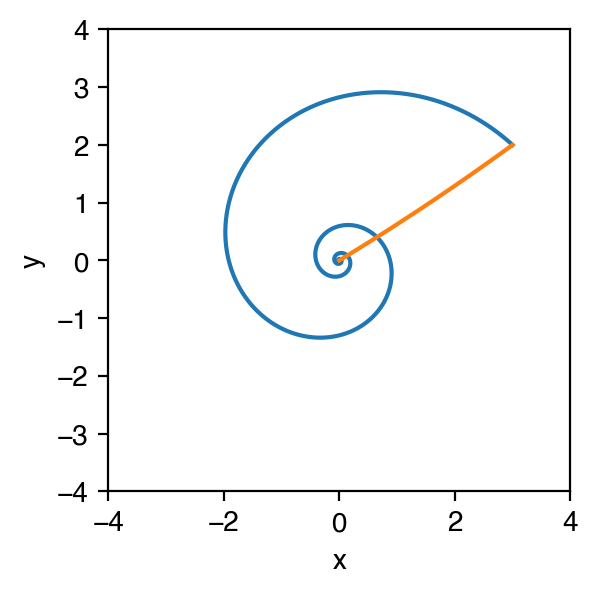

In [7]:
plot(xs1, ys1)
plot(xs2, ys2)
xlim(-4,4)
ylim(-4,4)
ax = gca()
ax.set_aspect("equal")
xlabel("x")
ylabel("y")

## Noise keeps oscillations alive

In [8]:
T = 5
dt = .001
N = int(T/dt)
ts = arange(0,N)*dt


def solve(x0, y0, g, ay, A):
    xs = zeros(N)
    ys = zeros(N)
    xs[0] = x0
    ys[0] = y0

    for i in range(1,N):
        dxdt = -g*ys[i-1] - xs[i-1]
        dydt = g*xs[i-1] - ay*ys[i-1]
        xs[i] = xs[i-1]+dt*dxdt+A*sqrt(dt)*randn()
        ys[i] = ys[i-1]+dt*dydt+A*sqrt(dt)*randn()
        
    return [xs, ys]

xs1, ys1 = solve(2,2,6,1,1)
xs2, ys2 = solve(2,2,6,1,5)

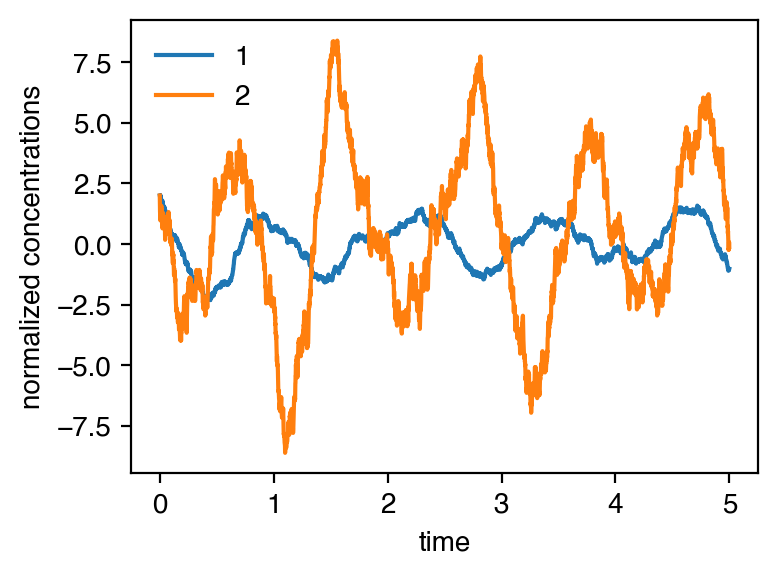

In [9]:
figure(figsize=(4,3))
plot(ts, xs1, label="1")
plot(ts, xs2, label="2")
legend(frameon=False)
xlabel("time")
ylabel("normalized concentrations")
tight_layout()
savefig("noise.png", dpi=300)

Text(0, 0.5, 'y')

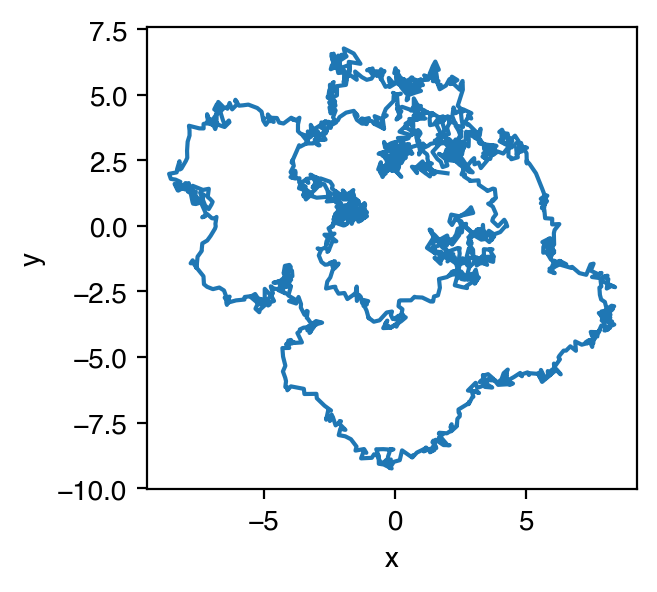

In [10]:
plot(xs2[ts<2], ys2[ts<2])
ax = gca()
ax.set_aspect("equal")
xlabel("x")
ylabel("y")

### Power spectra

In [11]:
M = 20
ps = zeros(N)

ay = 1
g = 6
A = 1

for j in range(M):
    xs, ys = solve(2,2,g,ay,A)
    ps += abs(fft(xs))**2

ps*=dt/(M*N)
nu = fftfreq(size(xs), dt)

Text(0, 0.5, 'power spectrum')

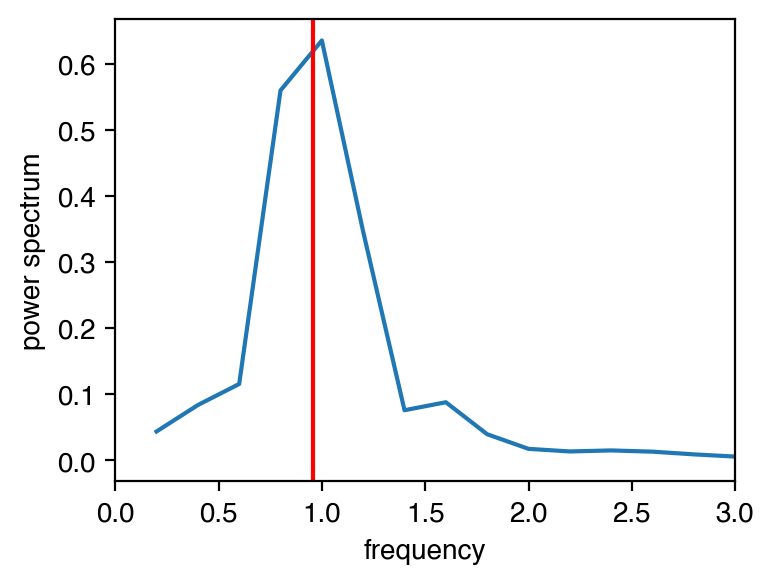

In [12]:
w = sqrt(g*g-(1-ay)**2/4)

plot(nu[nu>0], ps[nu>0], "-")
axvline(w/(2*pi), color='r')
xlim(0,3)
xlabel("frequency")
ylabel("power spectrum")

## The repressilator

In [13]:
T=100
dt=.001
N = int(T/dt)
ts = arange(0,N)*dt

def solve(x0, y0, z0, beta=1, n=2):

    xs = zeros(N)
    ys = zeros(N)
    zs = zeros(N)

    xs[0] = x0
    ys[0] = y0
    zs[0] = z0

    for i in range(1,N):
        dxdt = beta*hR(zs[i-1], n=n) - xs[i-1]
        dydt = beta*hR(xs[i-1], n=n) - ys[i-1]
        dzdt = beta*hR(ys[i-1], n=n) - zs[i-1]

        xs[i] = xs[i-1]+dt*dxdt
        ys[i] = ys[i-1]+dt*dydt
        zs[i] = zs[i-1]+dt*dzdt
        
    return [xs, ys, zs]

In [14]:
x1, y1, z1 = solve(3.1,0,4, beta=2, n=5)

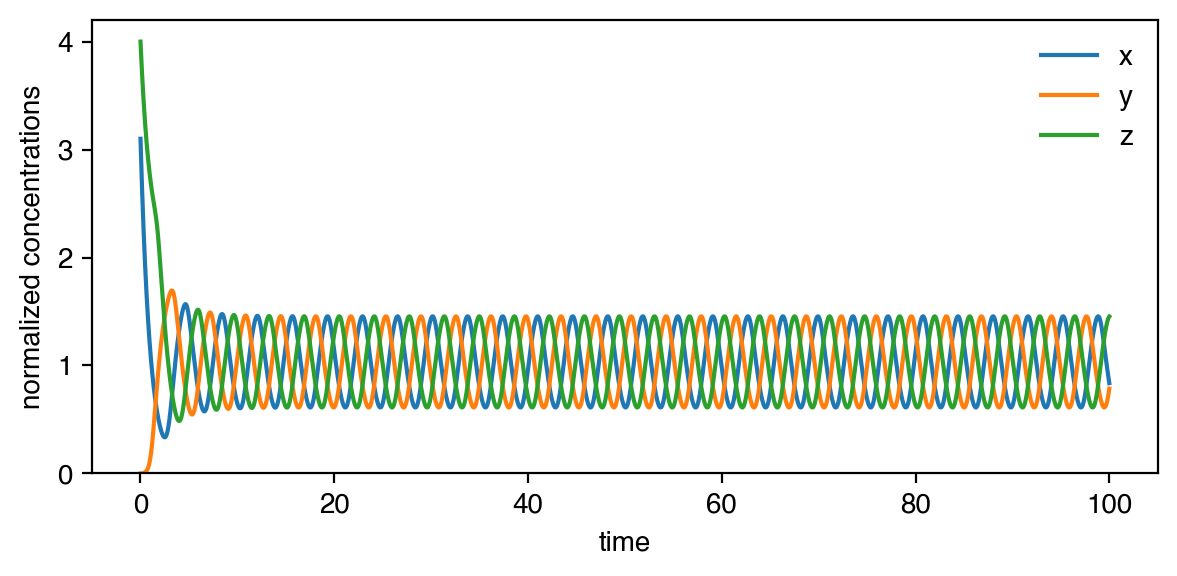

In [15]:
figure(figsize=(6,3))
plot(ts, x1, label="x")
plot(ts, y1, label="y")
plot(ts, z1, label="z")

legend(frameon=False, loc=0)
ylim(0)
xlabel("time")
ylabel("normalized concentrations")
tight_layout()
savefig("xyzt.png", dpi=300)

In [16]:
x2, y2, z2 = solve(1.1,1,1, beta=2, n=5)

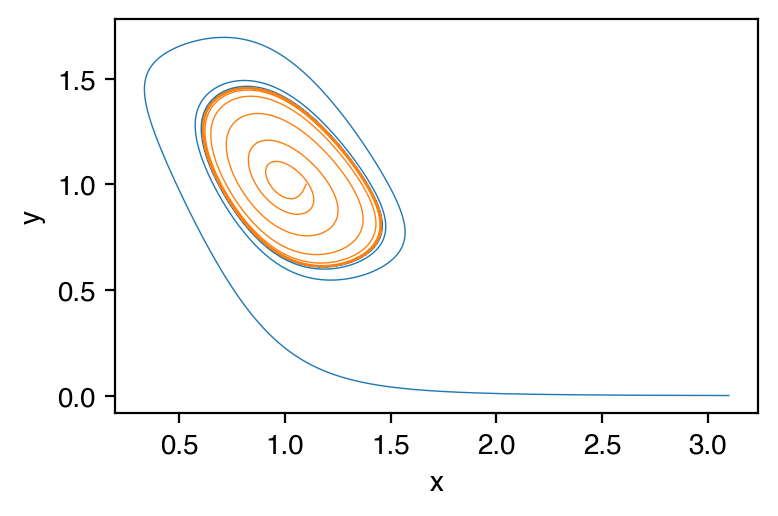

In [17]:
plot(x1, y1, lw=.5)
plot(x2, y2, lw=.5)
ax = gca()
ax.set_aspect('equal')
xlabel('x')
ylabel('y')
tight_layout()
savefig("phase.png", dpi=300)

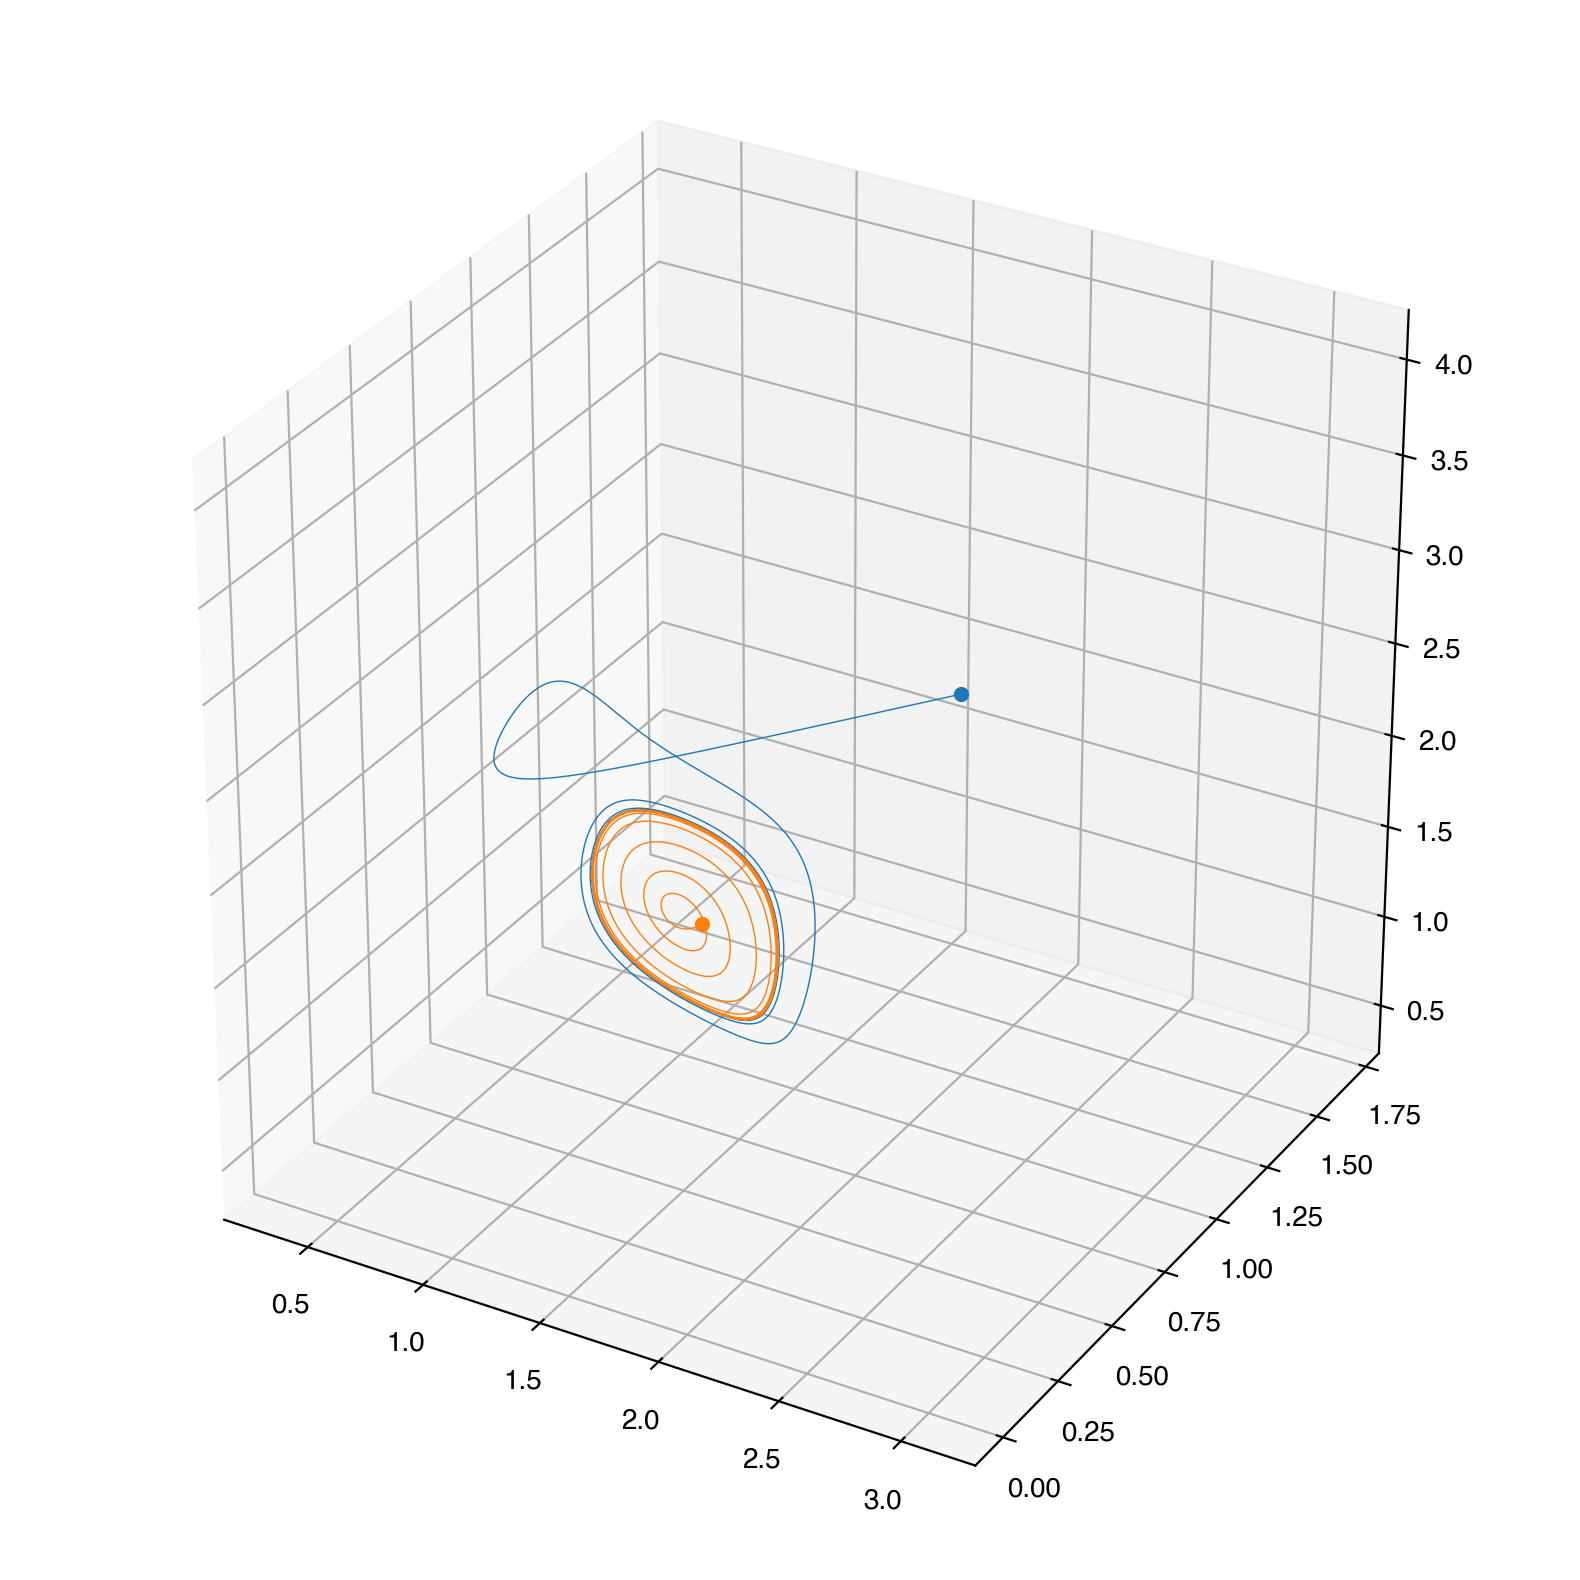

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D([x1[0]], [y1[0]], [z1[0]] )
ax.scatter3D([x2[0]], [y2[0]], [z2[0]] )
ax.plot3D(x1, y1, z1, lw=.5)
ax.plot3D(x2, y2, z2, lw=.5)
tight_layout()
savefig("phase3D.png", dpi=300)